# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# ==============================
# 📦 Import Library yang Dibutuhkan
# ==============================

# --- General Libraries ---
import pandas as pd
import numpy as np

# --- Visualisasi ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Standard Libraries ---
import warnings
warnings.filterwarnings('ignore')

# ==============================
# 🤖 Machine Learning Libraries
# ==============================
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
path = r"C:\Users\zerob\Documents\Laskar AI\Membangun Sistem Machine Learning\Eksperimen_SML_Bintang Cahya Anwar\diabetes-prediction_raw\diabetes-prediction.csv"
df = pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df[['hypertension', 'heart_disease', 'diabetes']].apply(pd.Series.unique)

,hypertension,heart_disease,diabetes
0,0,1,0
1,1,0,1


In [4]:
# Tinjau jumlah baris dan jumlah kolom pada dataset
print(f"Jumlah baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")

Jumlah baris: 100000, Jumlah Kolom: 9


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Exploratory Data Analysis - Deskripsi Variabel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Exploratory Data Analysis - Menangani Missing Value dan Outliers

In [7]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 3854


In [8]:
# Cek missing value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

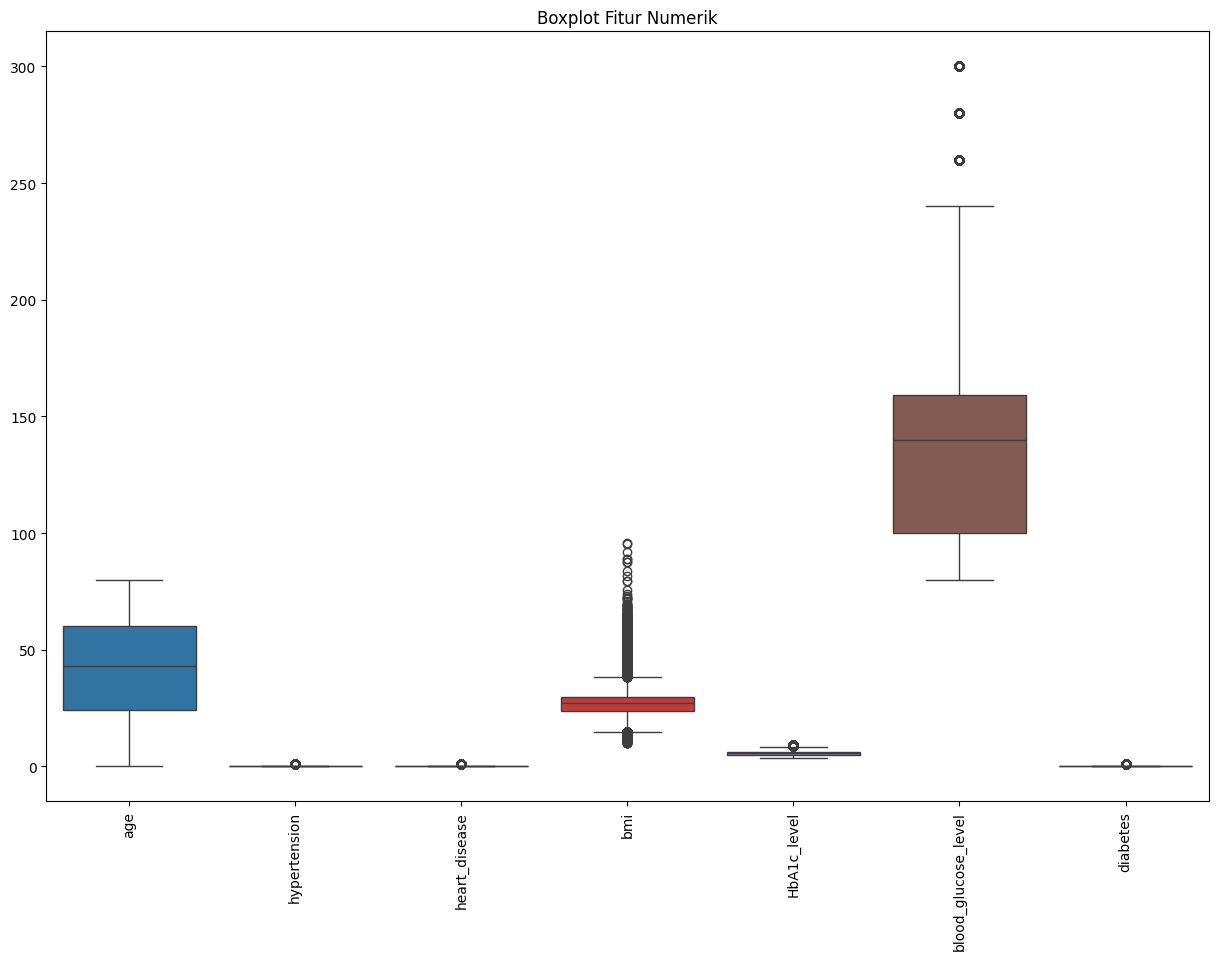

In [9]:
# Menampilkan boxplot untuk mendeteksi outlier pada kolom numerik
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Boxplot Fitur Numerik")
plt.show()

### Exploratory Data Analysis - Univariate Analysis

Statistik untuk fitur gender:
        Jumlah Sampel  Persentase
gender                           
Female          58552        58.6
Male            41430        41.4
Other              18         0.0



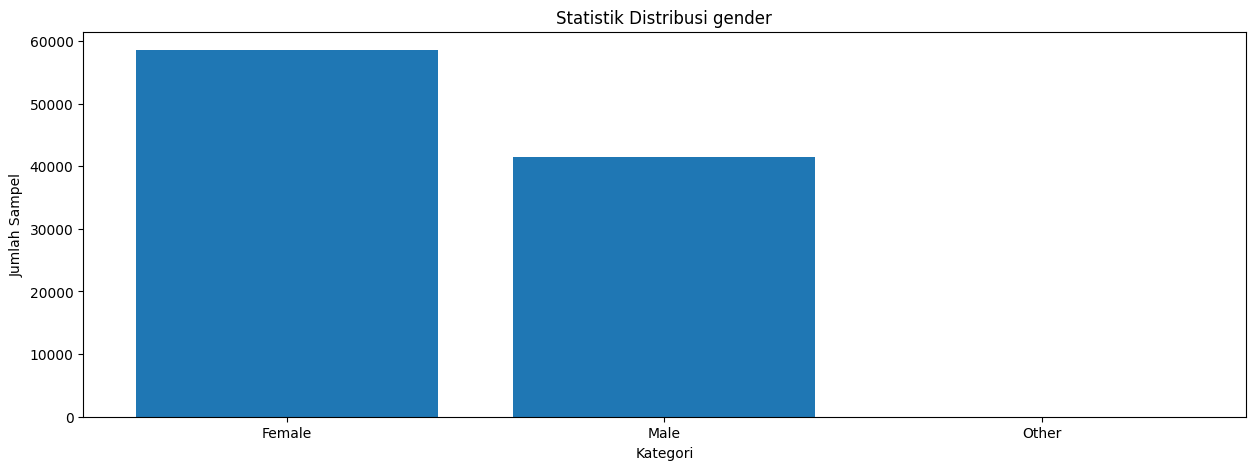

Statistik untuk fitur smoking_history:
                 Jumlah Sampel  Persentase
smoking_history                           
No Info                  35816        35.8
never                    35095        35.1
former                    9352         9.4
current                   9286         9.3
not current               6447         6.4
ever                      4004         4.0



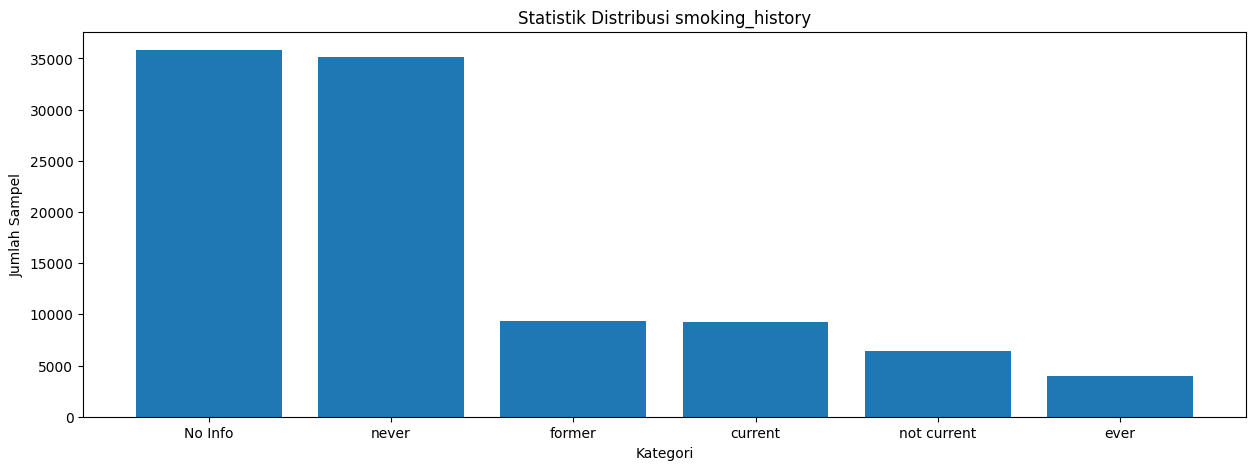

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
for feature in categorical_cols:
    count = df[feature].value_counts()
    percent = df[feature].value_counts(normalize=True) * 100
    stats_df = pd.DataFrame({"Jumlah Sampel": count, "Persentase": percent.round(1)})
    print(f"Statistik untuk fitur {feature}:\n{stats_df}\n")
    plt.figure(figsize=(15, 5))
    plt.bar(count.index, count.values)
    plt.title(f"Statistik Distribusi {feature}")
    plt.xlabel("Kategori")
    plt.ylabel("Jumlah Sampel")
    plt.show()

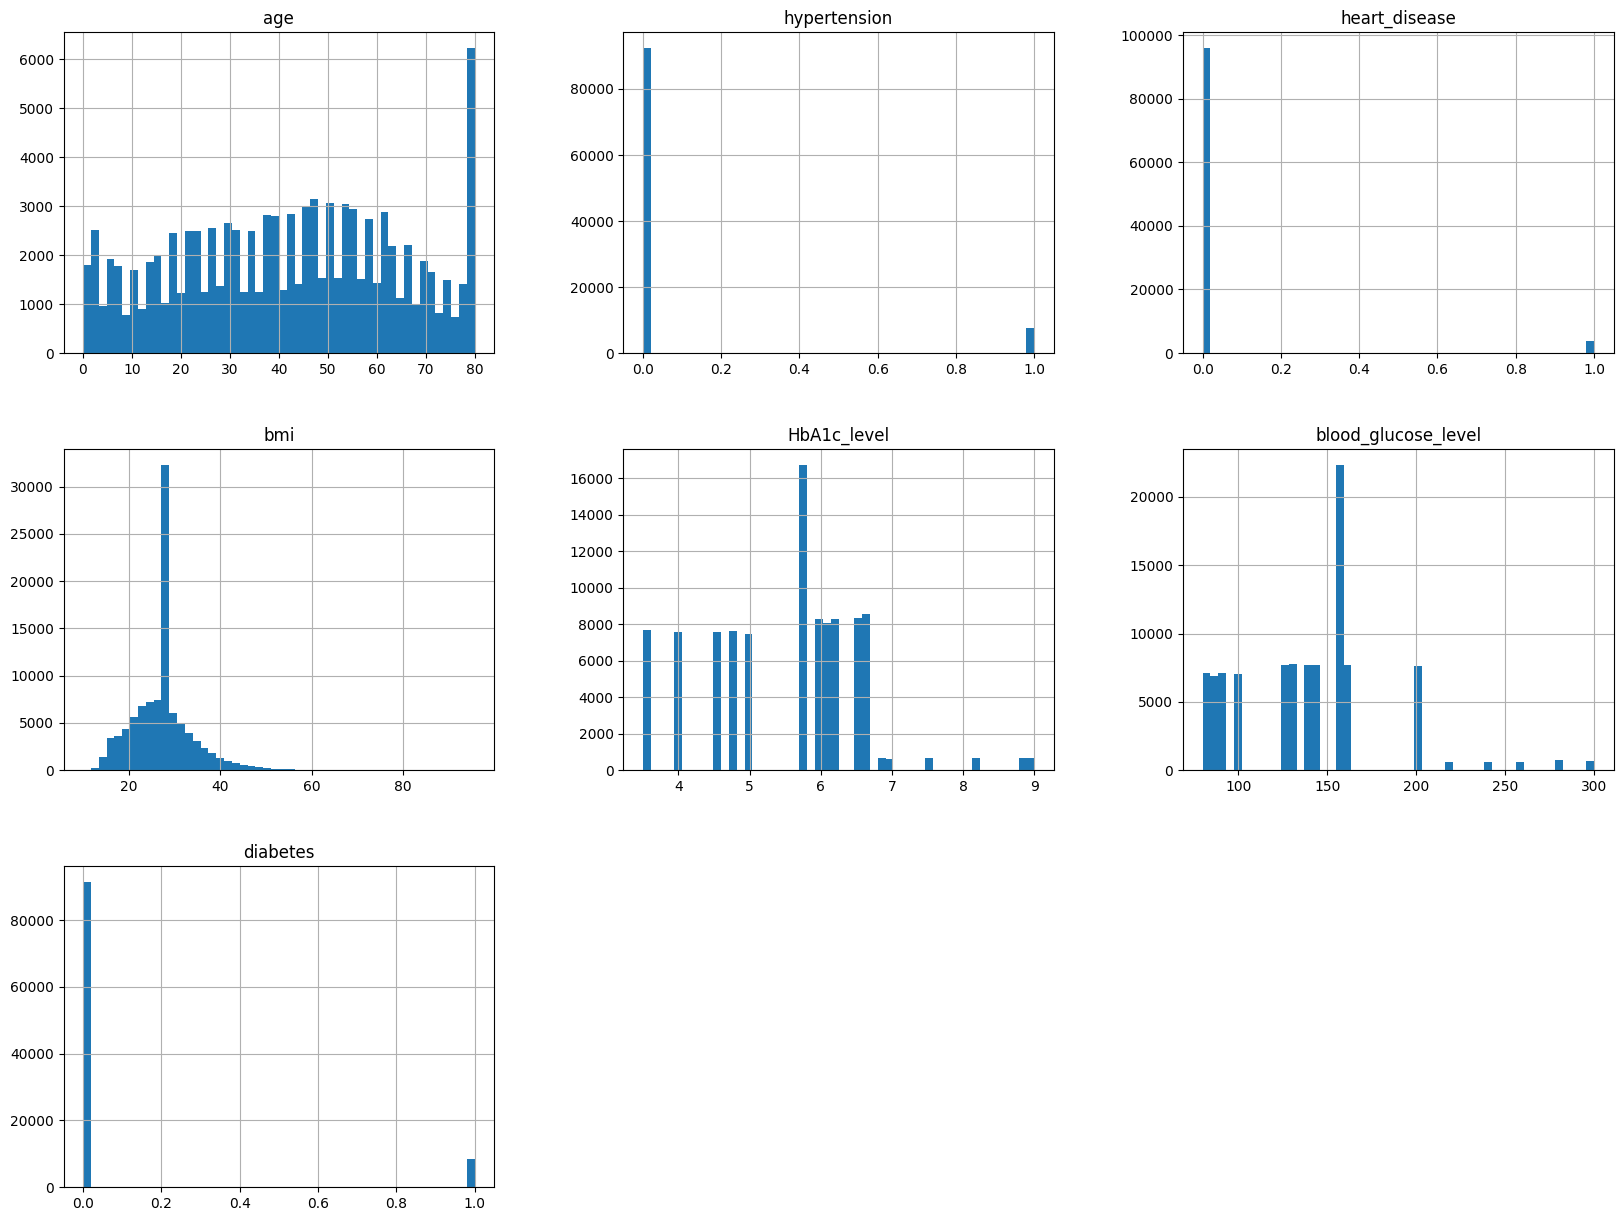

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Exploratory Data Analysis - Multivariate Analysis

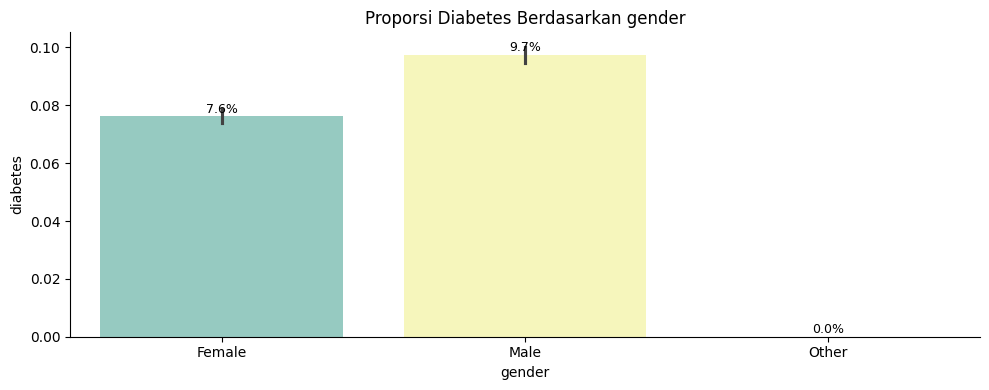

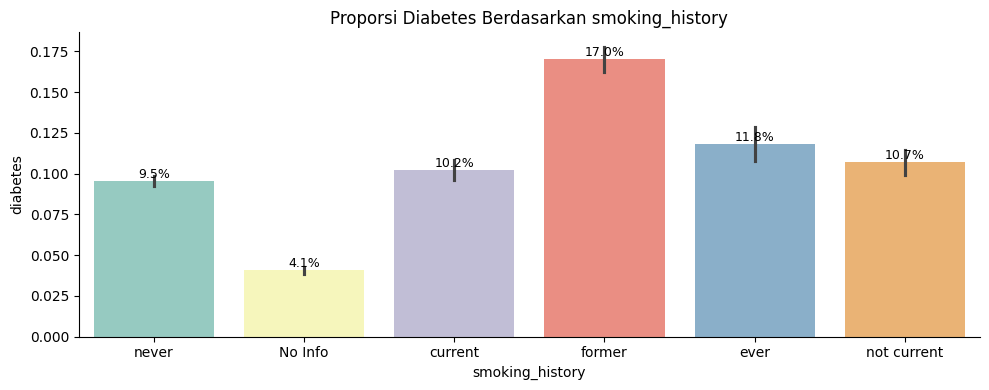

In [12]:
cat_features = df.select_dtypes(include='object').columns.to_list()

# Loop untuk semua fitur kategorikal
for col in cat_features:
    g = sns.catplot(
        x=col, y="diabetes", hue=col, kind="bar",
        data=df, palette="Set3", dodge=False, height=4, aspect=2.5, legend=False
    )

    plt.title("Proporsi Diabetes Berdasarkan {}".format(col))

    # Tambahkan label persentase di atas setiap bar
    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate(
                f'{p.get_height() * 100:.1f}%',  # tampilkan sebagai persentase
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0, 5), textcoords='offset points'
            )

    plt.tight_layout()
    plt.show()

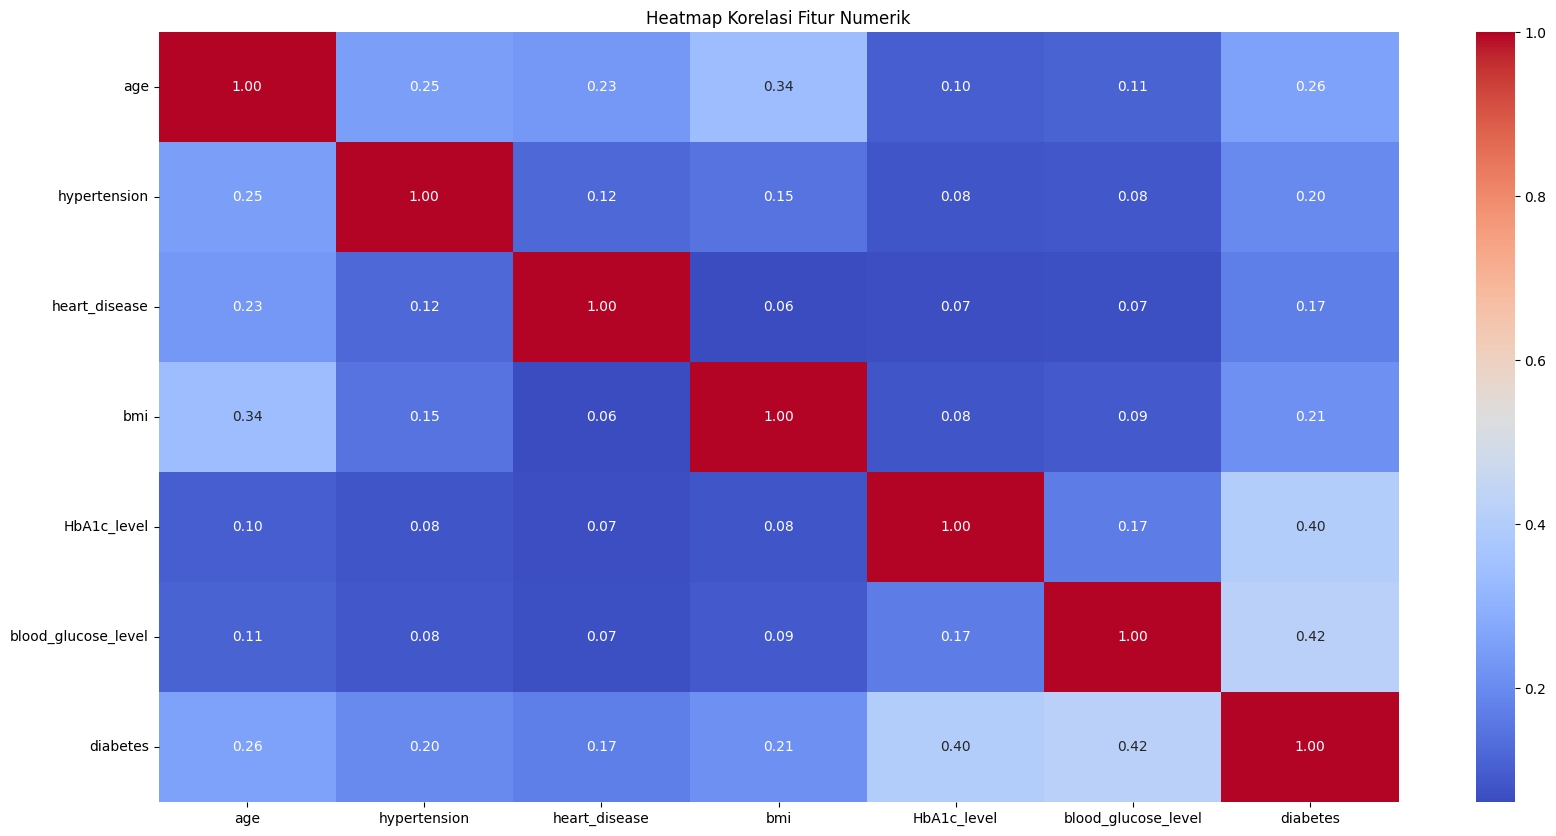

In [13]:
numerical_columns = df.select_dtypes(include=['number'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Deteksi dan Penanganan Outlier
4. Binning (Pengelompokan Data)
5. Encoding Data Kategorikal
6. Normalisasi atau Standarisasi Fitur

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values) (jika ada)
# Cek missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# Karena tidak ada missing value, skip handling

Jumlah missing value per kolom:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [15]:
# 2. Menghapus Data Duplikat
print(f"Jumlah duplikasi sebelum dihapus: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah data setelah hapus duplikasi: {len(df)}")

Jumlah duplikasi sebelum dihapus: 3854
Jumlah data setelah hapus duplikasi: 96146


In [16]:
# 3. Deteksi dan Penanganan Outlier
outlier_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level'] # List kolom yang butuh penanganan outlier
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df[outlier_cols] < (Q1 - 1.5 * IQR)) | (df[outlier_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask]

print("Data setelah penanganan outlier:")
print(df[outlier_cols].describe())

Data setelah penanganan outlier:
                bmi   HbA1c_level  blood_glucose_level
count  88195.000000  88195.000000         88195.000000
mean      26.314620      5.459188           134.630126
std        5.218361      0.995330            35.255872
min       13.710000      3.500000            80.000000
25%       23.050000      4.800000           100.000000
50%       27.320000      5.800000           140.000000
75%       28.690000      6.200000           158.000000
max       39.550000      8.200000           240.000000


In [17]:
# 4. Binning (Pengelompokan Data)
# Binning untuk kolom age
if 'age' in df.columns:
    bins = [-np.inf, 18.0, 35.0, 50.0, 65.0, np.inf]
    labels = ['<18', '18-35', '35-50', '50-65', '>65']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,>65
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,50-65
2,Male,28.0,0,0,never,27.32,5.7,158,0,18-35
3,Female,36.0,0,0,current,23.45,5.0,155,0,35-50
4,Male,76.0,1,1,current,20.14,4.8,155,0,>65


In [18]:
# 5. Encoding Data Kategorikal
categorical_cols = ['gender', 'smoking_history', 'age_group']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("Data setelah label encoder:")
df.head()

Data setelah label encoder:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,0,80.0,0,1,4,25.19,6.6,140,0,4
1,0,54.0,0,0,0,27.32,6.6,80,0,2
2,1,28.0,0,0,4,27.32,5.7,158,0,0
3,0,36.0,0,0,1,23.45,5.0,155,0,1
4,1,76.0,1,1,1,20.14,4.8,155,0,4


In [19]:
# 6. Normalisasi atau Standarisasi Fitur

# Fitur numerik yang akan distandarisasi
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("Data setelah standarisasi:")
df.head()

Data setelah standarisasi:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,0,1.723269,0,1,4,-0.215513,1.146171,0.152312,0,4
1,0,0.572354,0,0,0,0.192663,1.146171,-1.549541,0,2
2,1,-0.578561,0,0,4,0.192663,0.241943,0.662868,0,0
3,0,-0.224433,0,0,1,-0.548953,-0.461345,0.577776,0,1
4,1,1.546205,1,1,1,-1.183256,-0.662285,0.577776,0,4
